In [67]:
import csv 
import numpy as np 
import tensorflow as tf 
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('raw_data/y3.csv', sep = ',')
    

In [62]:
# y = ["" for x in range(2000)]
# for i in range(1000):
#     y[i] = "blues"

# for i in range(1000, 2000):
#     y[i] = "classical" 

# for i in range(2000, 3000):
#     y[i] = "country"

y = []
for i in range(1000):
    y.append(0)

for i in range(1000, 2000):
    y.append(1)
print(y[1500])
# y[1000:1999] = 'classical' 
# y[2000:2999] = 'country'


1


In [56]:
X = []

genre = 'blues'
ext = '.png'
folder = 'proj_images/'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X.append(imageio.imread(file))

genre = 'classical'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    X.append(imageio.imread(file))

print(np.shape(X))
# genre = 'country' 
# for i in range(1000):
#     file = folder + genre + str(i) + ext 
#     print("reading", file)
#     X.append(imageio.imread(file))

reading proj_images/blues0.png
reading proj_images/blues1.png
reading proj_images/blues2.png
reading proj_images/blues3.png
reading proj_images/blues4.png
reading proj_images/blues5.png
reading proj_images/blues6.png
reading proj_images/blues7.png
reading proj_images/blues8.png
reading proj_images/blues9.png
reading proj_images/blues10.png
reading proj_images/blues11.png
reading proj_images/blues12.png
reading proj_images/blues13.png
reading proj_images/blues14.png
reading proj_images/blues15.png
reading proj_images/blues16.png
reading proj_images/blues17.png
reading proj_images/blues18.png
reading proj_images/blues19.png
reading proj_images/blues20.png
reading proj_images/blues21.png
reading proj_images/blues22.png
reading proj_images/blues23.png
reading proj_images/blues24.png
reading proj_images/blues25.png
reading proj_images/blues26.png
reading proj_images/blues27.png
reading proj_images/blues28.png
reading proj_images/blues29.png
reading proj_images/blues30.png
reading proj_image

(2000, 717, 908, 3)


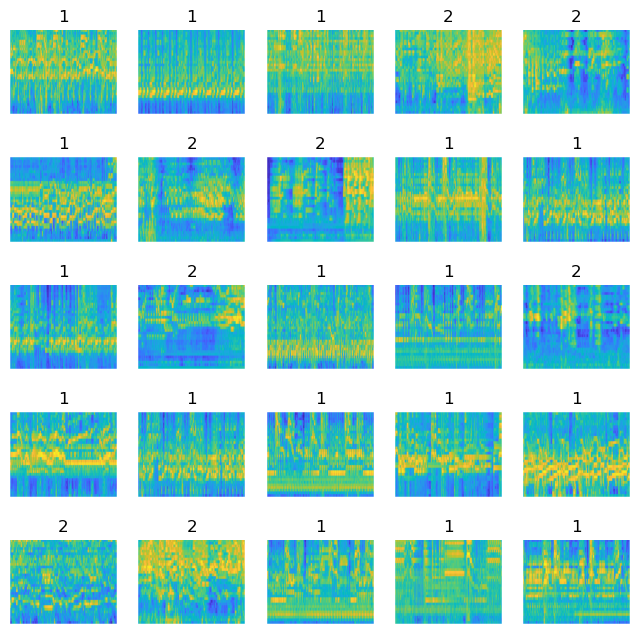

In [57]:
label_map = ['blues', 'classical']

print(np.shape(X))

#Visualizing our data.
fig, axes1 = plt.subplots(5, 5, figsize=(8, 8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0], cmap='gray')
        axes1[j][k].set_title(y[i])

In [68]:
X = np.asarray(X)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 31)


In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape = (717, 908, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 32)




# model = tf.keras.models.Sequential([ 
#     tf.keras.layers.Conv2D(32, 4, input_shape = (717, 908, 3)),
#     tf.keras.layers.MaxPool2D((2, 2)), 
#     tf.keras.layers.Conv2D(64, 4), 
    
# ])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 177, 225, 32)      11648     
                                                                 
 batch_normalization_27 (Bat  (None, 177, 225, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 88, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 88, 112, 64)       51264     
                                                                 
 batch_normalization_28 (Bat  (None, 88, 112, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
X = np.array([], dtype = 'object')

np.append(X, 1)


genre = 'blues'
ext = '.png'
folder = 'proj_images/'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    np.append(X, imageio.imread(file))

genre = 'classical'
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    np.append(X, imageio.imread(file))

genre = 'country' 
for i in range(1000):
    file = folder + genre + str(i) + ext 
    print("reading", file)
    np.append(X, imageio.imread(file))

print(np.shape(X))